# Tensorflow Modeling

### Sam Timmins

## Data Loading and Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv')
no_norm = ['Driver', 'Compound', 'Team', 'Track', 'NextSectorTime', 'FreshTyre']
cols_to_norm = [col for col in df.columns if col not in no_norm]
ss = StandardScaler()
df[cols_to_norm] = ss.fit_transform(df[cols_to_norm].values)
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'NextSectorTime'].to_numpy(),
                                                    df['NextSectorTime'].to_numpy(), test_size=0.2, random_state=42)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Embedding, concatenate

def create_model(X_train, df):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

In [3]:
model = create_model(X_train, df)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1)

Epoch 1/100
573/573 [==============================] - 2s 2ms/step - loss: 53.1418 - mse: 53.1418 - val_loss: 4.0959 - val_mse: 4.0959
Epoch 2/100
573/573 [==============================] - 1s 1ms/step - loss: 2.5581 - mse: 2.5581 - val_loss: 1.7719 - val_mse: 1.7719
Epoch 3/100
573/573 [==============================] - 1s 1ms/step - loss: 1.4097 - mse: 1.4097 - val_loss: 1.2018 - val_mse: 1.2018
Epoch 4/100
573/573 [==============================] - 1s 1ms/step - loss: 1.0072 - mse: 1.0072 - val_loss: 0.9634 - val_mse: 0.9634
Epoch 5/100
573/573 [==============================] - 1s 1ms/step - loss: 0.8153 - mse: 0.8153 - val_loss: 0.8119 - val_mse: 0.8119
Epoch 6/100
573/573 [==============================] - 1s 2ms/step - loss: 0.7043 - mse: 0.7043 - val_loss: 0.6823 - val_mse: 0.6823
Epoch 7/100
573/573 [==============================] - 1s 2ms/step - loss: 0.6427 - mse: 0.6427 - val_loss: 0.6658 - val_mse: 0.6658
Epoch 8/100
573/573 [==============================] - 1s 2ms/step 

In [5]:
from matplotlib import pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

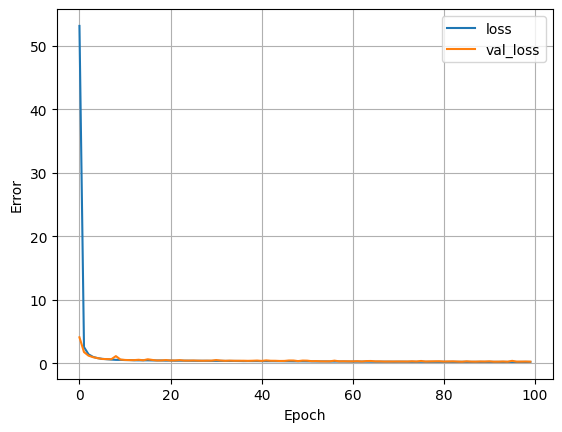

In [6]:
plot_loss(history)

In [7]:
from sklearn.metrics import mean_squared_error

pred = model.predict(X_test)
print(mean_squared_error(y_test, pred))
for i in range(0, len(pred)):
    print('Predicted: ', round(pred[i, 0], 3), '\tActual: ', y_test[i])

0.26097185497840575
Predicted:  17.986 	Actual:  17.425
Predicted:  30.392 	Actual:  30.32
Predicted:  34.976 	Actual:  37.538
Predicted:  27.89 	Actual:  28.18
Predicted:  29.762 	Actual:  30.384
Predicted:  25.147 	Actual:  25.078
Predicted:  32.76 	Actual:  32.689
Predicted:  24.385 	Actual:  25.623
Predicted:  23.589 	Actual:  23.438
Predicted:  43.56 	Actual:  43.378
Predicted:  24.821 	Actual:  24.789
Predicted:  26.777 	Actual:  25.891
Predicted:  41.344 	Actual:  41.467
Predicted:  20.806 	Actual:  20.646
Predicted:  30.576 	Actual:  30.789
Predicted:  21.529 	Actual:  22.033
Predicted:  30.064 	Actual:  29.802
Predicted:  25.016 	Actual:  24.487
Predicted:  29.978 	Actual:  30.23
Predicted:  32.179 	Actual:  32.094
Predicted:  25.52 	Actual:  25.772
Predicted:  23.596 	Actual:  23.378
Predicted:  32.128 	Actual:  33.478
Predicted:  26.058 	Actual:  25.91
Predicted:  43.256 	Actual:  43.545
Predicted:  25.647 	Actual:  25.316
Predicted:  42.769 	Actual:  42.799
Predicted:  18.7

In [8]:
df = pd.read_csv('data.csv')
no_norm = ['Driver', 'Compound', 'Team', 'Track', 'NextSectorTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'FreshTyre']
cols_to_norm = [col for col in df.columns if col not in no_norm]
ss = StandardScaler()
df[cols_to_norm] = ss.fit_transform(df[cols_to_norm].values)
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'NextSectorTime'].to_numpy(),
                                                    df['NextSectorTime'].to_numpy(), test_size=0.2, random_state=42)

Epoch 1/100
573/573 [==============================] - 1s 2ms/step - loss: 23.6771 - mse: 23.6771 - val_loss: 0.5809 - val_mse: 0.5809
Epoch 2/100
573/573 [==============================] - 1s 2ms/step - loss: 0.4934 - mse: 0.4934 - val_loss: 0.5425 - val_mse: 0.5425
Epoch 3/100
573/573 [==============================] - 1s 2ms/step - loss: 0.4773 - mse: 0.4773 - val_loss: 0.5266 - val_mse: 0.5266
Epoch 4/100
573/573 [==============================] - 1s 2ms/step - loss: 0.4667 - mse: 0.4667 - val_loss: 0.5505 - val_mse: 0.5505
Epoch 5/100
573/573 [==============================] - 1s 2ms/step - loss: 0.4522 - mse: 0.4522 - val_loss: 0.4931 - val_mse: 0.4931
Epoch 6/100
573/573 [==============================] - 1s 2ms/step - loss: 0.4429 - mse: 0.4429 - val_loss: 0.4779 - val_mse: 0.4779
Epoch 7/100
573/573 [==============================] - 1s 2ms/step - loss: 0.4384 - mse: 0.4384 - val_loss: 0.5920 - val_mse: 0.5920
Epoch 8/100
573/573 [==============================] - 1s 2ms/step 

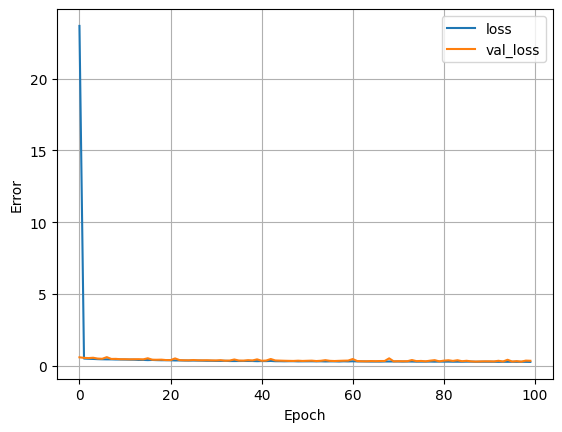

In [9]:
model = create_model(X_train, df)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1)
plot_loss(history)

In [10]:
pred = model.predict(X_test)
print(mean_squared_error(y_test, pred))
for i in range(0, len(pred)):
    print('Predicted: ', round(pred[i, 0], 3), '\tActual: ', y_test[i])

0.34460588447324236
Predicted:  17.72 	Actual:  17.425
Predicted:  30.78 	Actual:  30.32
Predicted:  35.56 	Actual:  37.538
Predicted:  28.276 	Actual:  28.18
Predicted:  29.719 	Actual:  30.384
Predicted:  25.317 	Actual:  25.078
Predicted:  32.867 	Actual:  32.689
Predicted:  23.813 	Actual:  25.623
Predicted:  23.886 	Actual:  23.438
Predicted:  43.976 	Actual:  43.378
Predicted:  24.956 	Actual:  24.789
Predicted:  26.608 	Actual:  25.891
Predicted:  41.618 	Actual:  41.467
Predicted:  20.78 	Actual:  20.646
Predicted:  31.396 	Actual:  30.789
Predicted:  21.52 	Actual:  22.033
Predicted:  30.347 	Actual:  29.802
Predicted:  25.623 	Actual:  24.487
Predicted:  30.271 	Actual:  30.23
Predicted:  32.457 	Actual:  32.094
Predicted:  25.754 	Actual:  25.772
Predicted:  23.289 	Actual:  23.378
Predicted:  32.539 	Actual:  33.478
Predicted:  25.937 	Actual:  25.91
Predicted:  43.5 	Actual:  43.545
Predicted:  25.549 	Actual:  25.316
Predicted:  42.927 	Actual:  42.799
Predicted:  18.472 

In [11]:
categorical_features = ['Driver', 'Compound', 'Team', 'Track', 'FreshTyre']
def create_model_more_layers(X_cat, X_num, weather, df):
    input_weather = Input(shape=(weather.shape[1],), 
                          dtype='float64', 
                          name='wide_inputs')
    
    weather_branch = Dense(units=512, activation='relu', name='weather_1')(input_weather)
    # weather_branch = Dense(units=64,activation='relu', name='weather_2')(weather_branch)
    
    input_cat = Input(shape=(X_cat.shape[1],),
                      dtype='int64',
                      name='categorical_input')
    
    cat_outputs = []
    for idx, col in enumerate(categorical_features):
        N = int(df[col].max() + 1)

        x = tf.gather(input_cat, idx, axis=1)
        
        x = Embedding(input_dim=N,
                      output_dim=int(np.sqrt(N)),
                      input_length=1,
                      name=col+'_embed')(x)
        
        cat_outputs.append(x)
        
    wide_branch = concatenate(cat_outputs, name='wide_cat')
    wide_branch = concatenate([wide_branch, weather_branch], name='wide_concat')
        
    input_num = Input(shape=(X_num.shape[1],),
                      name='numeric_input')
    deep_branch = Dense(units=1024, activation='relu', name='num_1')(input_num)
    deep_branch = Dense(units=512,activation='relu', name='deep1')(deep_branch)
    # deep_branch = Dense(units=32,activation='relu', name='deep2')(deep_branch)
    # deep_branch = Dense(units=16,activation='relu', name='deep3')(deep_branch)
    # deep_branch = Dense(units=8,activation='relu', name='deep4')(deep_branch)
    # deep_branch = Dense(units=5,activation='relu', name='deep5')(deep_branch)
    
    deep_branch = concatenate([wide_branch, deep_branch],
                               name='concat_deep_wide')
    
    deep_branch = Dense(units=64, activation='relu', name='deep5')(deep_branch)
    # deep_branch = Dense(units=16, activation='relu', name='deep6')(deep_branch)
    final_branch = Dense(units=1, name='combined')(deep_branch)
    
    model = Model(inputs=[input_cat, input_num, input_weather],
                 outputs=final_branch)
    
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mse'])
    
    return model

In [12]:
weather_features = ['AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed']
numerical_features = [col for col in df.columns if (col not in categorical_features and col not in weather_features)]
numerical_features.remove('NextSectorTime')
model = create_model_more_layers(df[categorical_features].to_numpy(dtype='int64'), df[numerical_features].to_numpy(),
                                 df[weather_features].to_numpy(), df)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
categorical_input (InputLayer)  [(None, 5)]          0                                            
__________________________________________________________________________________________________
tf.compat.v1.gather (TFOpLambda (None,)              0           categorical_input[0][0]          
__________________________________________________________________________________________________
tf.compat.v1.gather_1 (TFOpLamb (None,)              0           categorical_input[0][0]          
__________________________________________________________________________________________________
tf.compat.v1.gather_2 (TFOpLamb (None,)              0           categorical_input[0][0]          
______________________________________________________________________________________________

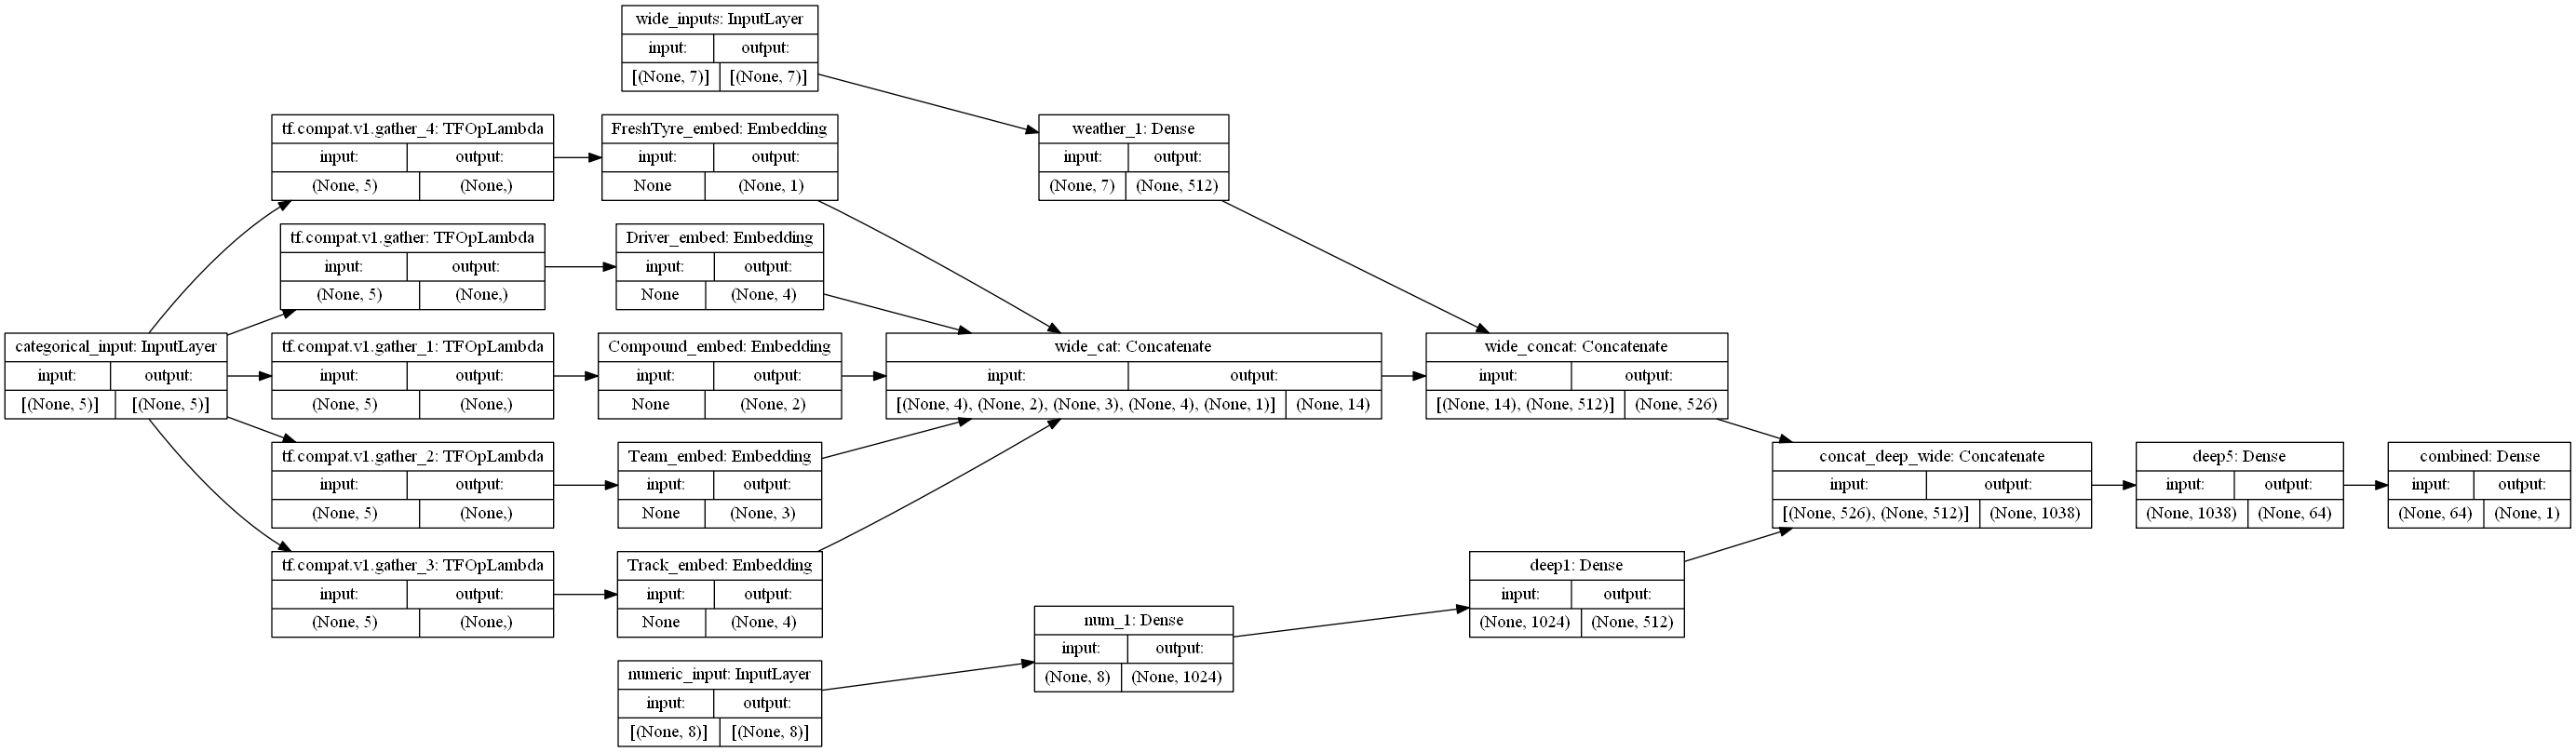

In [13]:
from tensorflow.keras.utils import plot_model

plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

history = model.fit([X_train[:, [df.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                     X_train[:, [df.columns.get_loc(col) for col in numerical_features]],
                     X_train[:, [df.columns.get_loc(col) for col in weather_features]]],
                     y_train, epochs=1000, batch_size=64, validation_split=0.1,
                     callbacks=[ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=0.00001, verbose=True),
                                EarlyStopping(monitor='loss', patience=5, verbose=True)])

Epoch 1/1000
573/573 [==============================] - 5s 7ms/step - loss: 7.0706 - mse: 7.0706 - val_loss: 0.5591 - val_mse: 0.5591
Epoch 2/1000
573/573 [==============================] - 4s 6ms/step - loss: 0.4837 - mse: 0.4837 - val_loss: 0.5124 - val_mse: 0.5124
Epoch 3/1000
573/573 [==============================] - 4s 6ms/step - loss: 0.4751 - mse: 0.4751 - val_loss: 0.4872 - val_mse: 0.4872
Epoch 4/1000
573/573 [==============================] - 4s 6ms/step - loss: 0.4828 - mse: 0.4828 - val_loss: 0.6457 - val_mse: 0.6457
Epoch 5/1000
573/573 [==============================] - 4s 6ms/step - loss: 0.5240 - mse: 0.5240 - val_loss: 0.7404 - val_mse: 0.7404
Epoch 6/1000
573/573 [==============================] - 3s 6ms/step - loss: 0.5036 - mse: 0.5036 - val_loss: 0.5187 - val_mse: 0.5187
Epoch 7/1000
573/573 [==============================] - 4s 6ms/step - loss: 0.4769 - mse: 0.4769 - val_loss: 0.4622 - val_mse: 0.4622
Epoch 8/1000
573/573 [==============================] - 4s 6ms

In [15]:
pred = model.predict([X_test[:, [df.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                      X_test[:, [df.columns.get_loc(col) for col in numerical_features]],
                      X_test[:, [df.columns.get_loc(col) for col in weather_features]]])
print(mean_squared_error(y_test, pred))
for i in range(0, len(pred)):
    print('Predicted: ', round(pred[i, 0], 3), '\tActual: ', y_test[i])

0.5818214291465262
Predicted:  17.397 	Actual:  17.425
Predicted:  30.291 	Actual:  30.32
Predicted:  34.861 	Actual:  37.538
Predicted:  27.647 	Actual:  28.18
Predicted:  29.546 	Actual:  30.384
Predicted:  24.504 	Actual:  25.078
Predicted:  32.387 	Actual:  32.689
Predicted:  21.605 	Actual:  25.623
Predicted:  23.28 	Actual:  23.438
Predicted:  43.199 	Actual:  43.378
Predicted:  24.338 	Actual:  24.789
Predicted:  26.348 	Actual:  25.891
Predicted:  40.625 	Actual:  41.467
Predicted:  20.462 	Actual:  20.646
Predicted:  30.676 	Actual:  30.789
Predicted:  21.245 	Actual:  22.033
Predicted:  30.101 	Actual:  29.802
Predicted:  24.98 	Actual:  24.487
Predicted:  29.576 	Actual:  30.23
Predicted:  31.702 	Actual:  32.094
Predicted:  25.295 	Actual:  25.772
Predicted:  23.035 	Actual:  23.378
Predicted:  32.238 	Actual:  33.478
Predicted:  25.447 	Actual:  25.91
Predicted:  43.011 	Actual:  43.545
Predicted:  24.942 	Actual:  25.316
Predicted:  42.173 	Actual:  42.799
Predicted:  18.

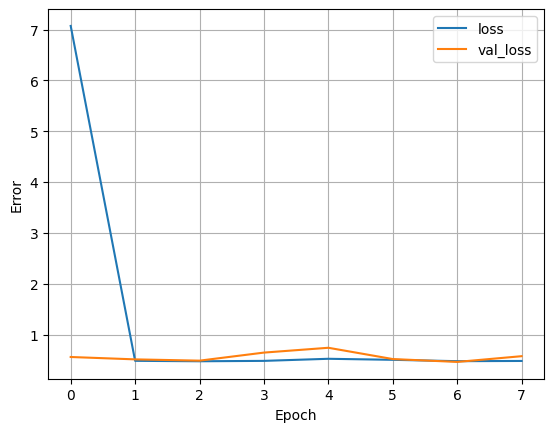

In [16]:
plot_loss(history)

In [17]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, pred)

0.48649516744283755

In [18]:
model = create_model_more_layers(df[categorical_features].to_numpy(dtype='int64'), df[numerical_features].to_numpy(),
                                 df[weather_features].to_numpy(), df)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
categorical_input (InputLayer)  [(None, 5)]          0                                            
__________________________________________________________________________________________________
tf.compat.v1.gather_5 (TFOpLamb (None,)              0           categorical_input[0][0]          
__________________________________________________________________________________________________
tf.compat.v1.gather_6 (TFOpLamb (None,)              0           categorical_input[0][0]          
__________________________________________________________________________________________________
tf.compat.v1.gather_7 (TFOpLamb (None,)              0           categorical_input[0][0]          
____________________________________________________________________________________________

In [19]:
history = model.fit([X_train[:, [df.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                     X_train[:, [df.columns.get_loc(col) for col in numerical_features]],
                     X_train[:, [df.columns.get_loc(col) for col in weather_features]]],
                     y_train, epochs=100, batch_size=128, validation_split=0.1,
                     callbacks=[ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=0.00001, verbose=True)])
                                # EarlyStopping(monitor='loss', patience=5, verbose=True)])

Epoch 1/100
287/287 [==============================] - 3s 7ms/step - loss: 9.1424 - mse: 9.1424 - val_loss: 0.5489 - val_mse: 0.5489
Epoch 2/100
287/287 [==============================] - 2s 6ms/step - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4900 - val_mse: 0.4900
Epoch 3/100
287/287 [==============================] - 2s 7ms/step - loss: 0.4471 - mse: 0.4471 - val_loss: 0.4981 - val_mse: 0.4981
Epoch 4/100
287/287 [==============================] - 2s 7ms/step - loss: 0.4398 - mse: 0.4398 - val_loss: 0.4674 - val_mse: 0.4674
Epoch 5/100
287/287 [==============================] - 2s 7ms/step - loss: 0.4460 - mse: 0.4460 - val_loss: 0.4705 - val_mse: 0.4705
Epoch 6/100
287/287 [==============================] - 2s 6ms/step - loss: 0.4545 - mse: 0.4545 - val_loss: 0.5127 - val_mse: 0.5127
Epoch 7/100
287/287 [==============================] - 2s 7ms/step - loss: 0.4505 - mse: 0.4505 - val_loss: 0.4629 - val_mse: 0.4629
Epoch 8/100
287/287 [==============================] - 2s 7ms/step - 

In [20]:
pred = model.predict([X_test[:, [df.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                      X_test[:, [df.columns.get_loc(col) for col in numerical_features]],
                      X_test[:, [df.columns.get_loc(col) for col in weather_features]]])
print('MSE:\t', mean_squared_error(y_test, pred))
print('MAE:\t', mean_absolute_error(y_test, pred))
for i in range(0, len(pred)):
    print('Predicted: ', round(pred[i, 0], 3), '\tActual: ', y_test[i])

MSE:	 0.3298928927700192
MAE:	 0.31722522307941753
Predicted:  17.483 	Actual:  17.425
Predicted:  30.271 	Actual:  30.32
Predicted:  35.176 	Actual:  37.538
Predicted:  28.082 	Actual:  28.18
Predicted:  29.88 	Actual:  30.384
Predicted:  24.886 	Actual:  25.078
Predicted:  32.624 	Actual:  32.689
Predicted:  23.481 	Actual:  25.623
Predicted:  23.573 	Actual:  23.438
Predicted:  43.588 	Actual:  43.378
Predicted:  24.693 	Actual:  24.789
Predicted:  26.525 	Actual:  25.891
Predicted:  41.135 	Actual:  41.467
Predicted:  20.516 	Actual:  20.646
Predicted:  31.161 	Actual:  30.789
Predicted:  21.527 	Actual:  22.033
Predicted:  29.986 	Actual:  29.802
Predicted:  25.307 	Actual:  24.487
Predicted:  29.964 	Actual:  30.23
Predicted:  32.009 	Actual:  32.094
Predicted:  25.689 	Actual:  25.772
Predicted:  23.237 	Actual:  23.378
Predicted:  32.341 	Actual:  33.478
Predicted:  25.789 	Actual:  25.91
Predicted:  43.258 	Actual:  43.545
Predicted:  25.229 	Actual:  25.316
Predicted:  42.586

In [21]:
model = create_model_more_layers(df[categorical_features].to_numpy(dtype='int64'), df[numerical_features].to_numpy(),
                                 df[weather_features].to_numpy(), df)
history = model.fit([X_train[:, [df.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                     X_train[:, [df.columns.get_loc(col) for col in numerical_features]],
                     X_train[:, [df.columns.get_loc(col) for col in weather_features]]],
                     y_train, epochs=100, batch_size=256, validation_split=0.1,
                     callbacks=[ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=0.00001, verbose=True)])
                                # EarlyStopping(monitor='loss', patience=5, verbose=True)])

Epoch 1/100
144/144 [==============================] - 1s 5ms/step - loss: 16.1504 - mse: 16.1504 - val_loss: 0.5552 - val_mse: 0.5552
Epoch 2/100
144/144 [==============================] - 1s 5ms/step - loss: 0.4611 - mse: 0.4611 - val_loss: 0.5316 - val_mse: 0.5316
Epoch 3/100
144/144 [==============================] - 1s 5ms/step - loss: 0.4486 - mse: 0.4486 - val_loss: 0.5037 - val_mse: 0.5037
Epoch 4/100
144/144 [==============================] - 1s 5ms/step - loss: 0.4362 - mse: 0.4362 - val_loss: 0.4892 - val_mse: 0.4892
Epoch 5/100
144/144 [==============================] - 1s 5ms/step - loss: 0.4393 - mse: 0.4393 - val_loss: 0.4756 - val_mse: 0.4756
Epoch 6/100
144/144 [==============================] - 1s 5ms/step - loss: 0.4258 - mse: 0.4258 - val_loss: 0.4738 - val_mse: 0.4738
Epoch 7/100
144/144 [==============================] - 1s 5ms/step - loss: 0.4217 - mse: 0.4217 - val_loss: 0.4962 - val_mse: 0.4962
Epoch 8/100
144/144 [==============================] - 1s 5ms/step 

In [22]:
pred = model.predict([X_test[:, [df.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                      X_test[:, [df.columns.get_loc(col) for col in numerical_features]],
                      X_test[:, [df.columns.get_loc(col) for col in weather_features]]])
print('MSE:\t', mean_squared_error(y_test, pred))
print('MAE:\t', mean_absolute_error(y_test, pred))
for i in range(0, len(pred)):
    print('Predicted: ', round(pred[i, 0], 3), '\tActual: ', y_test[i])

MSE:	 0.3403033440323961
MAE:	 0.32151459986308834
Predicted:  17.662 	Actual:  17.425
Predicted:  30.401 	Actual:  30.32
Predicted:  35.222 	Actual:  37.538
Predicted:  28.116 	Actual:  28.18
Predicted:  29.887 	Actual:  30.384
Predicted:  25.018 	Actual:  25.078
Predicted:  32.757 	Actual:  32.689
Predicted:  23.341 	Actual:  25.623
Predicted:  23.619 	Actual:  23.438
Predicted:  43.624 	Actual:  43.378
Predicted:  24.912 	Actual:  24.789
Predicted:  26.65 	Actual:  25.891
Predicted:  41.28 	Actual:  41.467
Predicted:  20.644 	Actual:  20.646
Predicted:  31.166 	Actual:  30.789
Predicted:  21.623 	Actual:  22.033
Predicted:  30.164 	Actual:  29.802
Predicted:  25.341 	Actual:  24.487
Predicted:  30.066 	Actual:  30.23
Predicted:  32.124 	Actual:  32.094
Predicted:  25.779 	Actual:  25.772
Predicted:  23.229 	Actual:  23.378
Predicted:  32.575 	Actual:  33.478
Predicted:  25.882 	Actual:  25.91
Predicted:  43.354 	Actual:  43.545
Predicted:  25.371 	Actual:  25.316
Predicted:  42.719 

In [23]:
from tensorflow.keras.layers import Dropout

def create_model_more_layers(X_cat, X_num, weather, df):
    input_weather = Input(shape=(weather.shape[1],), 
                          dtype='float64', 
                          name='wide_inputs')
    
    weather_branch = Dense(units=512, activation='relu', name='weather_1')(input_weather)
    # weather_branch = Dense(units=64,activation='relu', name='weather_2')(weather_branch)
    
    input_cat = Input(shape=(X_cat.shape[1],),
                      dtype='int64',
                      name='categorical_input')
    
    cat_outputs = []
    for idx, col in enumerate(categorical_features):
        N = int(df[col].max() + 1)

        x = tf.gather(input_cat, idx, axis=1)
        
        x = Embedding(input_dim=N,
                      output_dim=int(np.sqrt(N)),
                      input_length=1,
                      name=col+'_embed')(x)
        
        cat_outputs.append(x)
        
    wide_branch = concatenate(cat_outputs, name='wide_cat')
    wide_branch = concatenate([wide_branch, weather_branch], name='wide_concat')
        
    input_num = Input(shape=(X_num.shape[1],),
                      name='numeric_input')
    deep_branch = Dense(units=1024, activation='relu', name='num_1')(input_num)
    deep_branch = Dense(units=512,activation='relu', name='deep1')(deep_branch)
    # deep_branch = Dropout(0.2)(deep_branch)
    # deep_branch = Dense(units=32,activation='relu', name='deep2')(deep_branch)
    # deep_branch = Dense(units=16,activation='relu', name='deep3')(deep_branch)
    # deep_branch = Dense(units=8,activation='relu', name='deep4')(deep_branch)
    # deep_branch = Dense(units=5,activation='relu', name='deep5')(deep_branch)
    
    deep_branch = concatenate([wide_branch, deep_branch],
                               name='concat_deep_wide')
    
    deep_branch = Dense(units=256, activation='relu', name='deep5')(deep_branch)
    # deep_branch = Dense(units=16, activation='relu', name='deep6')(deep_branch)
    final_branch = Dense(units=1, name='combined')(deep_branch)
    
    model = Model(inputs=[input_cat, input_num, input_weather],
                 outputs=final_branch)
    
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mse'])
    
    return model

In [24]:
model = create_model_more_layers(df[categorical_features].to_numpy(dtype='int64'), df[numerical_features].to_numpy(),
                                 df[weather_features].to_numpy(), df)
history = model.fit([X_train[:, [df.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                     X_train[:, [df.columns.get_loc(col) for col in numerical_features]],
                     X_train[:, [df.columns.get_loc(col) for col in weather_features]]],
                     y_train, epochs=100, batch_size=256, validation_split=0.1,
                     callbacks=[ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=0.00001, verbose=True)])
                                # EarlyStopping(monitor='loss', patience=5, verbose=True)])

Epoch 1/100
144/144 [==============================] - 2s 6ms/step - loss: 17.9090 - mse: 17.9090 - val_loss: 0.5680 - val_mse: 0.5680
Epoch 2/100
144/144 [==============================] - 1s 5ms/step - loss: 0.4693 - mse: 0.4693 - val_loss: 0.5342 - val_mse: 0.5342
Epoch 3/100
144/144 [==============================] - 1s 5ms/step - loss: 0.4460 - mse: 0.4460 - val_loss: 0.4990 - val_mse: 0.4990
Epoch 4/100
144/144 [==============================] - 1s 5ms/step - loss: 0.4392 - mse: 0.4392 - val_loss: 0.5102 - val_mse: 0.5102
Epoch 5/100
144/144 [==============================] - 1s 5ms/step - loss: 0.4358 - mse: 0.4358 - val_loss: 0.4756 - val_mse: 0.4756
Epoch 6/100
144/144 [==============================] - 1s 5ms/step - loss: 0.4310 - mse: 0.4310 - val_loss: 0.4764 - val_mse: 0.4764
Epoch 7/100
144/144 [==============================] - 1s 5ms/step - loss: 0.4199 - mse: 0.4199 - val_loss: 0.5428 - val_mse: 0.5428
Epoch 8/100
144/144 [==============================] - 1s 5ms/step 

In [25]:
pred = model.predict([X_test[:, [df.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                      X_test[:, [df.columns.get_loc(col) for col in numerical_features]],
                      X_test[:, [df.columns.get_loc(col) for col in weather_features]]])
print('MSE:\t', mean_squared_error(y_test, pred))
print('MAE:\t', mean_absolute_error(y_test, pred))
for i in range(0, len(pred)):
    print('Predicted: ', round(pred[i, 0], 3), '\tActual: ', y_test[i])

MSE:	 0.34728613082966553
MAE:	 0.3257815233431522
Predicted:  17.619 	Actual:  17.425
Predicted:  30.501 	Actual:  30.32
Predicted:  35.252 	Actual:  37.538
Predicted:  28.116 	Actual:  28.18
Predicted:  29.927 	Actual:  30.384
Predicted:  24.912 	Actual:  25.078
Predicted:  32.685 	Actual:  32.689
Predicted:  23.235 	Actual:  25.623
Predicted:  23.601 	Actual:  23.438
Predicted:  43.718 	Actual:  43.378
Predicted:  24.768 	Actual:  24.789
Predicted:  26.718 	Actual:  25.891
Predicted:  41.351 	Actual:  41.467
Predicted:  20.529 	Actual:  20.646
Predicted:  31.196 	Actual:  30.789
Predicted:  21.661 	Actual:  22.033
Predicted:  30.289 	Actual:  29.802
Predicted:  25.398 	Actual:  24.487
Predicted:  30.017 	Actual:  30.23
Predicted:  32.208 	Actual:  32.094
Predicted:  25.754 	Actual:  25.772
Predicted:  23.134 	Actual:  23.378
Predicted:  32.525 	Actual:  33.478
Predicted:  25.839 	Actual:  25.91
Predicted:  43.543 	Actual:  43.545
Predicted:  25.347 	Actual:  25.316
Predicted:  42.79

In [26]:
max = 0
for i in range(0, len(pred)):
    if abs(pred[i, 0] - y_test[i]) > max:
        max = abs(pred[i, 0] - y_test[i])
        print('Predicted: ', round(pred[i, 0], 3), '\tActual: ', y_test[i])

max

Predicted:  17.619 	Actual:  17.425
Predicted:  35.252 	Actual:  37.538
Predicted:  23.235 	Actual:  25.623
Predicted:  28.557 	Actual:  24.369
Predicted:  20.901 	Actual:  25.819
Predicted:  37.784 	Actual:  45.508


7.724194152832034